# Football results statistical analysis

The main idea of this project is to practice different concepts of descriptive and inferential statistics, using the international soccer results dataset. We are going to focus in:
- Number of goals by year. 
- Rare results, defined as matches with more than 10 goals.
- Home team performance.

Link:
https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

##### Questions
- Is the number of goals increasing by match ever year?
- How total goals by match are distributed?
- What can we expect for next years?
- How frequently we can see a 10 or more goals match?
- How much we have to wait to see a 10 or more goals match?
- Home team is more likely to win?

## 1. Load libraries and dataset

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import datetime

# Load dataset
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 2. Data validation and manipulation
We transform the date column to datetime, we check the integrity of data and we build new columns

In [2]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [4]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

#### 2.1 New columns to build
- year
- month
- total_score
- result

In [5]:
# year
df['year'] = df['date'].apply(lambda x: x.year)

# month
df['month'] = df['date'].apply(lambda x: x.month)

# total_score
df['total_score'] = df['home_score'] + df['away_score']

# result
result = []
for index, row in df.iterrows():
    if row['home_score'] > row['away_score']:
        result.append('home')
    elif row['home_score'] < row['away_score']:
        result.append('away')
    else:
        result.append('tie')
        
df['result'] = result

# home_win
home_win = []
for index, row in df.iterrows():
    if row['home_score'] > row['away_score']:
        home_win.append(True)
    else:
        home_win.append(False)

df['home_win'] = home_win
        
# print head
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_score,result,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,tie,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,home,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,home,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,tie,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,home,True


##### Drop 2022 values (because it didn't yet finished) and 2020 (due to restrictions of Covid-19 pandemic)

In [6]:
indexes_2022 = df[(df['year'] == 2020) | (df['year'] == 2022)].index
df.drop(indexes_2022, inplace=True)
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_score,result,home_win
43102,2021-12-18,Tunisia,Algeria,0,2,Arab Cup,Al Khor,Qatar,True,2021,12,2,away,False
43103,2021-12-18,United States,Bosnia and Herzegovina,1,0,Friendly,Los Angeles,United States,False,2021,12,1,home,True
43104,2021-12-30,Mauritania,Burkina Faso,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2021,12,0,tie,False
43105,2021-12-30,Sudan,Ethiopia,2,3,Friendly,Limbé,Cameroon,True,2021,12,5,away,False
43106,2021-12-31,Malawi,Comoros,2,1,Friendly,Jeddah,Saudi Arabia,True,2021,12,3,home,True


## 3. Descriptive statistics

In [7]:
df[['home_score','away_score','total_score']].describe()

,home_score,away_score,total_score
count,42808.000000,42808.000000,42808.000000
mean,1.745235,1.184475,2.929709
std,1.755485,1.402638,2.089688
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,31.000000,21.000000,31.000000


#### 3.1 'total_score' by 'year'

In [8]:
df1 = df.groupby('year')['total_score'].agg([np.sum,np.max,np.mean,np.std,np.median,'count'])
df1.reset_index(inplace=True)
df1.tail()

,year,sum,amax,mean,std,median,count
144,2016,2536,12,2.732759,1.838614,3.0,928
145,2017,2583,14,2.696242,1.868903,2.0,958
146,2018,2369,13,2.609031,1.912705,2.0,908
147,2019,3321,15,2.872837,2.073604,3.0,1156
148,2021,2973,14,2.737569,1.906624,2.0,1086


#### 3.2 Visual EDA

##### Is the number of goals by year increasing?

##### First graph: mean of goals by year

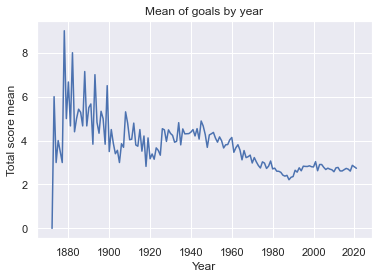

In [9]:
sns.set()
_ = plt.plot(df1['year'], df1['mean'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Total score mean')
_ = plt.title('Mean of goals by year')
plt.show()

- The mean is decreasing by time

##### Question
Why mean of goals is decreasing?:
- Because it changed the way of playing
- Because the sample for recent years is bigger than precedent years and then the estimate is more precise

##### Possible causes:
- With the professionalization of soccer, physical training is preferred over technique
- Changes in tactics and game dynamics
- Changes in the rules 

##### Second graph: total score by year

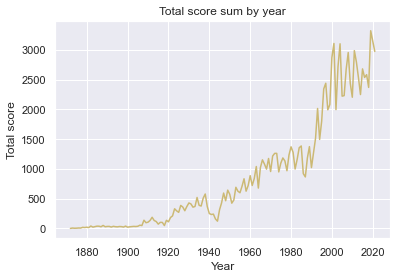

Comparing 1946 to 2019 we had a goal growth of 774.13%


In [41]:
_ = plt.plot(df1['year'], df1['sum'], color = 'y')
_ = plt.xlabel('Year')
_ = plt.ylabel('Total score')
_ = plt.title('Total score sum by year')
plt.show()

df_1946 = df[df['year'] == 1946]
df_2019 = df[df['year'] == 2019]

goal_growth = round((sum(df_2019['total_score']) * 100) / sum(df_1946['total_score']),2)

print(f"Comparing 1946 to 2019 we had a goal growth of {goal_growth}%")

##### Third graph: number of matches by year

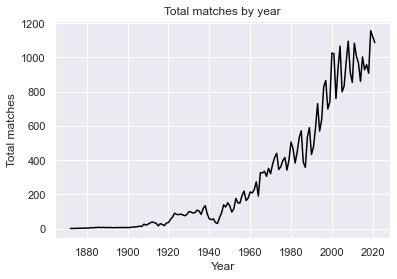

Comparing 1946 to 2019 we had a match growth of 1256.52%


In [40]:
_ = plt.plot(df1['year'], df1['count'], color = 'black')
_ = plt.xlabel('Year')
_ = plt.ylabel('Total matches')
_ = plt.title('Total matches by year')
plt.show()

match_growth = round((len(df_2019) * 100) / len(df_1946),2)

print(f"Comparing 1946 to 2019 we had a match growth of {match_growth}%")

The last two graphs are quite similar:
- Obvious conclusion: as we have more matches, we have more goals

##### Fourth graph: total matches vs total score

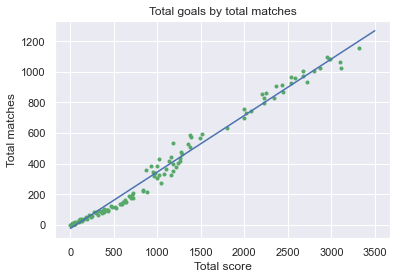

Pearson correlation coeff: 0.9937959709348687
Slope = 0.3691759152811899
Intercept = -23.437566543559925


In [12]:
# Make a scatterplot
_ = plt.plot(df1['sum'], df1['count'], color = 'g', marker='.', linestyle='none')
_ = plt.xlabel('Total score')
_ = plt.ylabel('Total matches')
_ = plt.title('Total goals by total matches')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df1['sum'], df1['count'], 1)

# Plot regression line
x = np.array([0, 3500])
y = a * x + b

# Add regression line
_ = plt.plot(x, y)

plt.show()

print(f"Pearson correlation coeff: {np.corrcoef(df1['sum'],df1['count'])[0,1]}")
print(f'Slope = {a}')
print(f'Intercept = {b}')

##### Fifth graph: total score boxplot

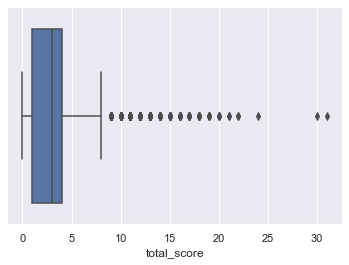

In [13]:
_ = sns.boxplot(x=df['total_score'])
plt.show()

- Median is 3
- 75% of events are between 1 and 4
- There are many outliers with two results with 30 or more goals

##### Sixth graph: result

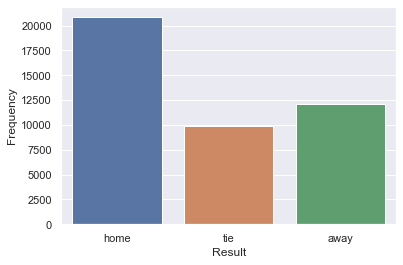

In [14]:
_ = sns.countplot(x=df['result'], order = ['home','tie','away'])
_ = plt.xlabel("Result")
_ = plt.ylabel("Frequency")
plt.show()

##### Seventh graph: home win

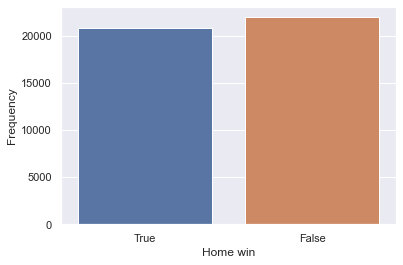

In [15]:
_ = sns.countplot(x=df['home_win'], order = [True, False])
_ = plt.xlabel("Home win")
_ = plt.ylabel("Frequency")
plt.show()

## 4. Inferential statistics

#### 4.1. Probability distribution

##### How total goals are distributed?

Our distribution of total score seems to be ***Poisson distributed***: In probability theory and statistics, the **Poisson distribution** is a ***discrete probability distribution*** that expresses the probability of a given number of events occurring in a fixed `interval` of time or space if these events occur with a ***known constant mean rate*** and ***independently*** of the time since the last event.
- `k`: number of goals
- `interval`: 1 match

Following: https://en.wikipedia.org/wiki/Poisson_distribution

##### Assumptions and validity:
- `k` is the number of times an event occurs in an interval and can take values 0, 1, 2, ….
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently: ***a goal is independent from other goals within a match***.
- The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time: ***our mean rate is virtually costant with a 2.93 goals per match and a peak on 3***.
- Two events cannot occur at exactly the same instant; instead, at each very small sub-interval, either exactly one event occurs, or no event occurs.
- The number of trials must be quite bigger than the number of succeses: ***the number of total matches (trials) is quite bigger than goals per match (succeses)***.

##### Probability Mass Function (PMF)
A ***probability mass function*** is a function that gives the probability that a discrete random variable (in this case, ***number of goals per match***) is exactly equal to some value. A ***PMF*** is defined as the set of probabilities of discrete outcomes.

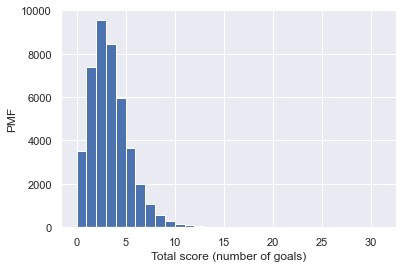

In [16]:
sns.set()
_ = plt.hist(df['total_score'], bins=31)
_ = plt.xlabel('Total score (number of goals)')
_ = plt.ylabel('PMF')
plt.show()

#### 4.2. Empirical cumulative distribution function (ECDF)

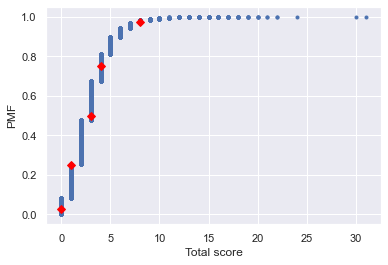

In [17]:
# Define an ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

# Percentiles
percentiles = np.array([2.5,25,50,75,97.5])
df_percentiles = np.percentile(df['total_score'], percentiles)

# ECDF
x, y = ecdf(df['total_score'])

# Show the plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Total score')
_ = plt.ylabel('PMF')
_ = plt.plot(df_percentiles, percentiles/100, marker='D', color='red',linestyle= 'none')
plt.show()

##### Conclusions
- Almost 50% of probability to have at least 3 goals
- Matches with more than 10 goals are extremely rare

#### 4.3. Parameter estimation

##### Does data fit our model?
We simulate 10000 poisson distributions with a `k` mean of 2.93 goals by match and we compare it with our empirical data

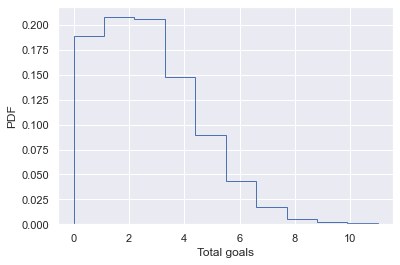

In [18]:
##### Calculate 'k'
# Set random number generator (seed)
np.random.seed(42)

# 'k'
k = np.mean(df['total_score'])

# Draw a poisson distribution with 'k' as parameter and a size of 10000
k_poisson = np.random.poisson(k, 10000)

# Plot a PDF (area under the curve gives the probability)
_ = plt.hist(k_poisson, bins=10, density=True, histtype='step')
_ = plt.xlabel('Total goals')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

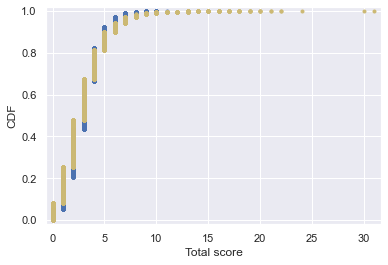

In [19]:
##### Overlay empirical CDF and theoretical CDF
# Create an ECDF from real data: x, y
x, y = ecdf(df['total_score'])

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(k_poisson)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none', color='y')


# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Total score')
plt.ylabel('CDF')

# Show the plot
plt.show()

Data fits our model!

#### 4.4. Bootstrap
##### What can we expect for next years?
Use resampled with replacement data to make statistical inference.
1. **Bootstrap samples**: we simulate getting data again performing 10000 samples with replacement from the original data
2. **Bootstrap replicates**: we compute the summary statistic of interest (mean) from every sample obtained.
3. **PDF**: we plot a probability density function to see what can we expect if we reproduce the experiment again.
4. **Confidence interval**: interval with x% confidence level in which we can expect our statistic of interest to lie if the experiment is repeated.

##### Run the bootstrap

Mean: 2.9297291324051575
Standard error: 0.010099828029134011
Standard deviation: 0.010117624969901387


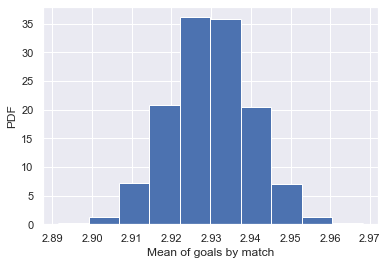

We can expect that mean of total goals for the future 42808 matches will fall between 2.9098293543262943 and 2.949496005419548


In [20]:
# Define empty array whose lenght is equal to the size of the experiment (number of bootstrap samples)
bs_replicates = np.empty(10000)

# Make samples and calculate their replicates
for i in range(10000):
    bs_sample = np.random.choice(df['total_score'], len(df['total_score']))
    bs_replicates[i] = np.mean(bs_sample)
    
# Print mean and standard error
print(f"Mean: {np.mean(bs_replicates)}")
print(f"Standard error: {np.std(df['total_score'])/np.sqrt(len(df['total_score']))}")
print(f"Standard deviation: {np.std(bs_replicates)}")

# Plot Histogram
_ = plt.hist(bs_replicates, bins=10, density=True)
_ = plt.xlabel('Mean of goals by match')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Confidence intervals
lim1, lim2 = np.percentile(bs_replicates, [2.5,97.5])

# Conclusions
print(f"We can expect that mean of total goals for the future {len(df['total_score'])} matches will fall between {lim1} and {lim2}")

#### 4.5. What about matches with 10 or more goals
We calculate the ammount of matches until we have a match with more than ten goals. Then we perform statistical inference.

In [21]:
# Build the times_to_11_goals
times_to_11_goals = []
matches = 0

for x in df['total_score']:
    if x <= 10:
        matches += 1
    else:
        matches += 1
        times_to_11_goals.append(matches)
        matches = 0
    
print(times_to_11_goals)

[20, 37, 3, 62, 12, 88, 3, 90, 23, 124, 13, 60, 122, 172, 229, 3, 464, 54, 25, 23, 32, 48, 206, 73, 25, 10, 58, 26, 25, 47, 133, 6, 79, 34, 45, 54, 99, 87, 5, 118, 36, 72, 120, 34, 75, 10, 76, 41, 220, 114, 42, 6, 10, 8, 144, 99, 51, 81, 14, 90, 232, 54, 47, 115, 63, 77, 50, 94, 331, 238, 52, 5, 5, 43, 6, 11, 115, 373, 35, 6, 3, 88, 170, 225, 114, 175, 253, 79, 109, 30, 229, 365, 4, 2, 483, 87, 151, 9, 25, 72, 348, 298, 68, 22, 955, 59, 514, 1, 2, 1, 1, 6, 189, 9, 739, 383, 448, 5, 176, 393, 1425, 737, 1183, 15, 5, 431, 566, 529, 873, 36, 2, 9, 4, 902, 495, 6, 46, 3, 630, 6, 225, 103, 40, 520, 8, 32, 273, 76, 6, 87, 20, 49, 398, 421, 3, 166, 50, 104, 15, 2, 1, 3, 6, 4, 3, 13, 57, 1, 23, 46, 167, 339, 417, 8, 329, 25, 124, 328, 4, 6, 3, 8, 9, 15, 26, 172, 194, 21, 192, 147, 664, 1, 3, 214, 5, 835, 393, 226, 5, 77, 391, 184, 2, 8, 463, 136, 1416, 6, 877, 148, 830, 25, 25, 647, 51, 11, 139, 76, 129, 14, 9, 822, 712, 5, 29, 1141, 289, 428, 836, 1296, 34, 84, 490, 274, 19, 1, 1, 6, 1, 279, 

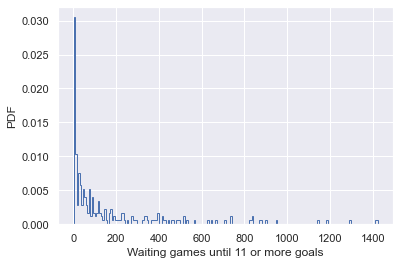

Mean: 172.18032786885246


In [42]:
# Make the PDF
_ = plt.hist(times_to_11_goals, bins=200, density=True, histtype='step')
_ = plt.xlabel('Waiting games until 11 or more goals')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# 'k': mean waiting time
k = np.mean(times_to_11_goals)
print(f"Mean: {k}")

#### 4.6. Exponential distribution
The ***exponential distribution*** is the probability distribution of the time between events in a Poisson point process, 
in which events occur continuously and independently at a constant average rate.
- It has a single parameter, the mean waiting time. 
- This distribution is not peaked

**Test**: the waiting time (number of matches) until we see a match with more than ten goals is exponentially distributed?

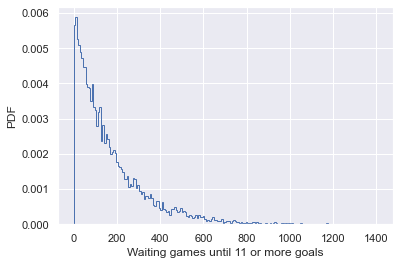

In [23]:
# Seed random number generator
np.random.seed(42)

# Run the experiment
theor_times_to_11_goals = np.random.exponential(k, 10000)

# Make the PDF
_ = plt.hist(theor_times_to_11_goals, bins=200, density=True, histtype='step')
_ = plt.xlabel('Waiting games until 11 or more goals')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

##### Does data follow our distribution?

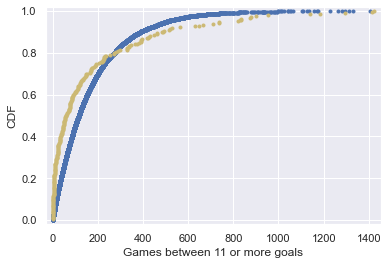

In [24]:
# Create an ECDF from empirical data: x, y
x, y = ecdf(times_to_11_goals)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(theor_times_to_11_goals)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none', color='y')


# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between 11 or more goals')
plt.ylabel('CDF')

# Show the plot
plt.show()

Even though the empirical distribution does not follow precisely the theoretical distribution, we can assume that our data is exponentially distributed.
- This suggest that having matches with more than 10 goals is a random process that is independent from previous matches.

#### 4.7. What about home team performance?
We model the home team performance as a binomial distribution of `n` bernoulli trials where every event (single match) has two possible outcomes:
- Home win
- Home does not win
- `n = 1000000`: we simulate 1 million matches

##### How many home wins can we expect in 1 million matches

In [25]:
# Home win probability
p = np.sum(df['home_win'])/len(df['home_win'])
print(f"Probability of home win: {p}")

# Make bernoulli trials: n = 1000000
success = 0

np.random.seed(42)
for i in range(1000000):
    number = np.random.random() < p
    
    # If number < p is a success
    if number == True:
        success +=1
        
print(success)

Probability of home win: 0.48691833302186505
486441


#### 4.8. Binomial distribution
The number ***r*** of successes in ***n*** Bernoulli trials with probability ***p*** of success is ***Binomially distributed***.

- We simulate 100 experiments with 50000 games and we calculate the probability of home win for every experiment
- We plot the ecdf and binomial distribution

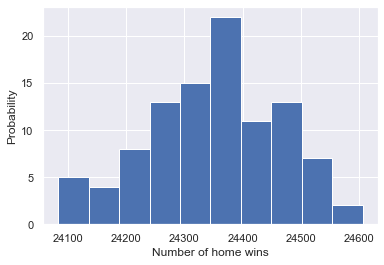

In [32]:
def bernoulli_trial(r, p):
    "Function that makes a Bernouli trial with 'r' successes and a probability 'p'"
    success = 0
    
    for i in range(r):
        number = np.random.random() < p

        # If number < p is a success
        if number == True:
            success +=1
    
    return success

np.random.seed(42)
n_experiments = np.empty(100)

for i in range(100):
    n_experiments[i] = bernoulli_trial(50000, p)
    
_ = plt.hist(n_experiments, bins=10)
_ = plt.xlabel('Number of home wins')
_ = plt.ylabel('Probability')

plt.show()

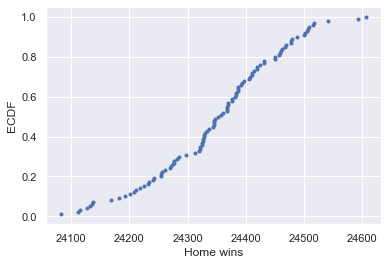

We might expect that in next 50000 matches, home wins will be betwenn 24121 and 24530 with 95% of confidence


In [35]:
x, y = ecdf(n_experiments)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Home wins')
_ = plt.ylabel('ECDF')

plt.show()

lim1, lim2 = np.percentile(n_experiments, [2.5, 97.5])

print(f"We might expect that in next 50000 matches, home wins will be between {int(lim1)} and {int(lim2)} with 95% of confidence")

## 5. Conclusions

**1. The number of goals by match is not increasing by year but getting constant**.
- In earlier years we had more goals by match due to changes in the game.
- In earlier years the ammount of games was reduced while in recent years it increased so our data for that years is more robust.
- Comparing 1946 to 2019 we had a match growth of 1256.52% traduced in a goal growth of 774.13%

**2. How total goals by match are distributed?**
- Poisson distributed, with a mean rate virtually costant with a 2.93 goals per match and a peak on 3.
- We have almost 50% of probability to have at least 3 goals
- Matches with more than 10 goals are extremely rare

**3. What can we expect for next years?**
- We can expect that mean of total goals for the future 42808 matches will fall between 2.91 and 2.95

**4. how much we have to wait to see a 10 or more goals match?**
- Is an extremely rare event
- Is exponential distributed; the event is randomic and independt to other events.
- Mean: 172.18

**5. home team is more likely to win?**
- We might expect that in next 50000 matches, home wins will be betwenn 24121 and 24530 with 95% of confidence
- Probability of home team winning is just lower than 50%
- This happens because the original set of discrete results has 3 possible successes: win, lose, tie.